# Import required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [2]:
a_list = list(range(6))
b_list = a_list[1:4]
print('a before:', a_list)
print('b before:', b_list)
b_list[0] = 1000
print('a after:', a_list)
print('b after:', b_list)

a before: [0, 1, 2, 3, 4, 5]
b before: [1, 2, 3]
a after: [0, 1, 2, 3, 4, 5]
b after: [1000, 2, 3]


In [3]:
a_array = np.arange(6)
b_array = a_array[1:4]
print('a before:', a_array)
print('b before:', b_array)
b_array[0] = 1000
print('a after:', a_array)
print('b after:', b_array)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [   0 1000    2    3    4    5]
b after: [1000    2    3]


In [4]:
a_array = np.arange(6)
b_array = a_array[1:4].copy()
print('a before:', a_array)
print('b before:', b_array)
b_array[0] = 1000
print('a after:', a_array)
print('b after:', b_array)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [0 1 2 3 4 5]
b after: [1000    2    3]


In [5]:
a_array = np.arange(6)
b_array = np.array(a_array[1:4])
print('a before:', a_array)
print('b before:', b_array)
b_array[0] = 1000
print('a after:', a_array)
print('b after:', b_array)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [0 1 2 3 4 5]
b after: [1000    2    3]


In [6]:
x = np.arange(1,5).reshape(2,2)
x

array([[1, 2],
       [3, 4]])

# Exercise 2

In [7]:
x = np.arange(1,7)
x

array([1, 2, 3, 4, 5, 6])

In [8]:
x = x.reshape(-1,2)

In [9]:
x.shape

(3, 2)

In [10]:
x.reshape(-1,4)

ValueError: cannot reshape array of size 6 into shape (4)

# Exercise 3

In [11]:
a = np.array([0,1,2])
b = np.array([3,0,0])

In [12]:
a_dot_b = np.dot(a,b)

In [13]:
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)

In [14]:
cos_theta = a_dot_b/(norm_a*norm_b)

In [15]:
theta = np.arccos(cos_theta)

In [16]:
theta*(180/np.pi) 

90.0

In [17]:
np.pi/2 == theta

True

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

In [18]:
N = 1000
x = np.linspace(-1,1,N)
x

array([-1.        , -0.997998  , -0.995996  , -0.99399399, -0.99199199,
       -0.98998999, -0.98798799, -0.98598599, -0.98398398, -0.98198198,
       -0.97997998, -0.97797798, -0.97597598, -0.97397397, -0.97197197,
       -0.96996997, -0.96796797, -0.96596597, -0.96396396, -0.96196196,
       -0.95995996, -0.95795796, -0.95595596, -0.95395395, -0.95195195,
       -0.94994995, -0.94794795, -0.94594595, -0.94394394, -0.94194194,
       -0.93993994, -0.93793794, -0.93593594, -0.93393393, -0.93193193,
       -0.92992993, -0.92792793, -0.92592593, -0.92392392, -0.92192192,
       -0.91991992, -0.91791792, -0.91591592, -0.91391391, -0.91191191,
       -0.90990991, -0.90790791, -0.90590591, -0.9039039 , -0.9019019 ,
       -0.8998999 , -0.8978979 , -0.8958959 , -0.89389389, -0.89189189,
       -0.88988989, -0.88788789, -0.88588589, -0.88388388, -0.88188188,
       -0.87987988, -0.87787788, -0.87587588, -0.87387387, -0.87187187,
       -0.86986987, -0.86786787, -0.86586587, -0.86386386, -0.86

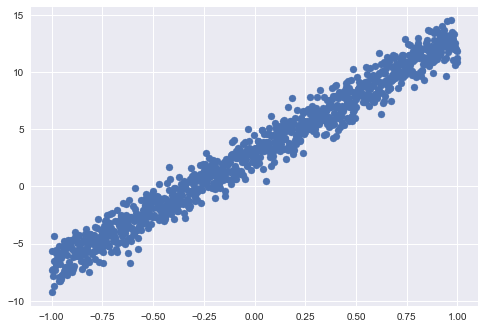

In [19]:
N = 1000 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1,N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)

(array([ 13., 223., 511., 238.,  15.]),
 array([-3.79078196, -2.30580131, -0.82082066,  0.66415999,  2.14914064,
         3.63412129]),
 <a list of 5 Patch objects>)

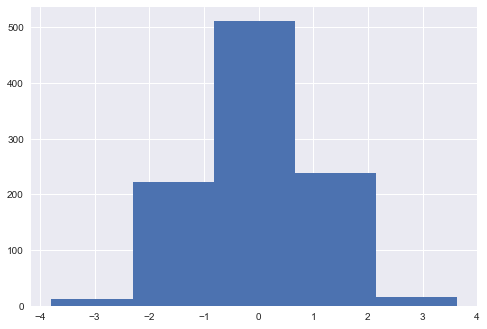

In [20]:
# eps follows standard normal distribution
eps = np.random.normal(0,1,N)
plt.hist(eps, bins=5)

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [21]:
# Define the function for our linear model
def model(param,x1):
    return np.matmul(param, x1)

# Define the function for our loss function
def loss_func(param, x1, y): 
    y_hat = model(param,x1)
    return np.mean( (y-y_hat)**2 )

Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [22]:
beta = np.random.normal(0,1,2) #initialize beta
tol = 1e-7 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
k = 0
h =  2*np.array([ [1, np.mean(x) ], [np.mean(x), np.mean(x**2)] ])

while np.abs(delta) >= tol:
    
    y_hat = model(beta, x1)
    g = -2*np.array([ np.mean(y-y_hat), np.mean(x*(y-y_hat)) ])
    
    
    prev_loss = loss_func(beta, x1, y)
    #solution 1
    beta -= np.linalg.solve(h,g)
    
    #solution 2
    #inv_h = np.linalg.inv(h)
    #beta -= np.matmul(inv_h,g)
    current_loss = loss_func(beta, x1, y)
    
    delta = current_loss - prev_loss
    
    print('At {}-th step, the loss is {:.3f}'.format(k, current_loss))
    k += 1
    


At 0-th step, the loss is 1.018
At 1-th step, the loss is 1.018


## Visualizing the result

The estimated value for beta is: [ 2.9657494  10.03063674]
The true value for beta is: [ 3 10]


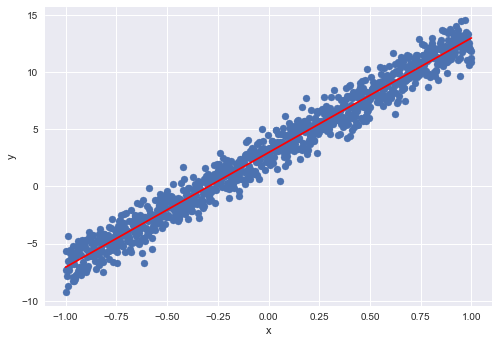

In [23]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [24]:
beta = np.random.normal(0,1,2)

alpha = 6e-1
tol = 1e-7
delta = 1
k = 0

while np.abs(delta) >= tol:
    
    y_hat = model(beta, x1)
    g = -2*np.array([ np.mean(y-y_hat), np.mean(x*(y-y_hat)) ])
    
    
    prev_loss = loss_func(beta, x1, y)

    #solution for gradient descent
    beta -= alpha*g 
    
    current_loss = loss_func(beta, x1, y)
    
    delta = current_loss - prev_loss
    
    print('At {}-th step, the loss is {:.3f}'.format(k, current_loss))
    k += 1


At 0-th step, the loss is 15.926
At 1-th step, the loss is 6.221
At 2-th step, the loss is 2.880
At 3-th step, the loss is 1.687
At 4-th step, the loss is 1.258
At 5-th step, the loss is 1.104
At 6-th step, the loss is 1.049
At 7-th step, the loss is 1.029
At 8-th step, the loss is 1.022
At 9-th step, the loss is 1.020
At 10-th step, the loss is 1.019
At 11-th step, the loss is 1.018
At 12-th step, the loss is 1.018
At 13-th step, the loss is 1.018
At 14-th step, the loss is 1.018
At 15-th step, the loss is 1.018
At 16-th step, the loss is 1.018
At 17-th step, the loss is 1.018
At 18-th step, the loss is 1.018
At 19-th step, the loss is 1.018


## Visualizing the result

The estimated value for beta is: [ 2.9657494  10.03024612]
The true value for beta is: [ 3 10]


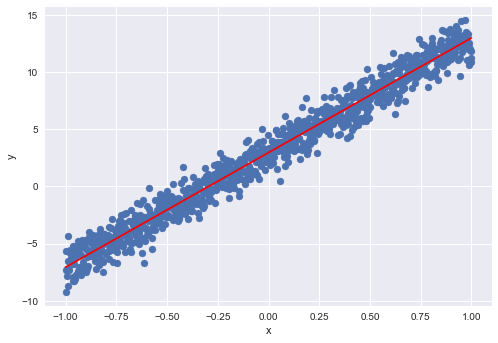

In [25]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()